# GESTION DE PORTEFEUILLE - Assignement 1


#### Hugo Lamarre - HEC Montréal
#### Hiver 2023

### Etudiants

CARON Sébastien  - 11271997 

LEPEYTRE Vincent - 11237013

NONGUIERMA Harold  -

TOURÉ Ousmane  -

In [322]:
import importlib
import numpy as np
import Functions as f
import Functions_3 as f3
importlib.reload(f)
importlib.reload(f3)

import numpy as np
import pandas as pd
from scipy import optimize
import scipy.optimize as sco



#### Data Importation

In [211]:
Data = f.Load_ind_data()["Data"]
Data = Data[Data.index >= '2000-01'] # We keep only the data after 2000

Data_select = Data[['Meals','Guns','Hshld','Oil','Txtls']]

Industrie_selected = Data_select.columns

c:\Users\Sébastien\Desktop\TP1\Functions.py:17: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda x: pd.datetime.strptime(x,'%Y%m')


In [207]:
Expected_Risk_free = f.Load_rf()/100


## Question 1
### (a) Graph the mean-variance frontier without risk-free asset of the selected 5 industry portfolios.
Display each industry portfolio in the chart.

#### Estimation of the covariance-matrix and expected return   :

In [213]:
# Expected return : other possible approach simple machine learning with technical indicator 
E_return = f.annualize_rets(Data_select/100, 12)  #On a besoin des rendement annualisées comme le risk free rate est annualisé 
E_cov = Data_select.cov() # Just for test
Nbr_PTF = 100

##### Determination of the optimal  portfolio  for a given return (with Short Sell) :

array([ 0.68975152,  0.55793294,  0.10913644, -0.02089182, -0.33592907])

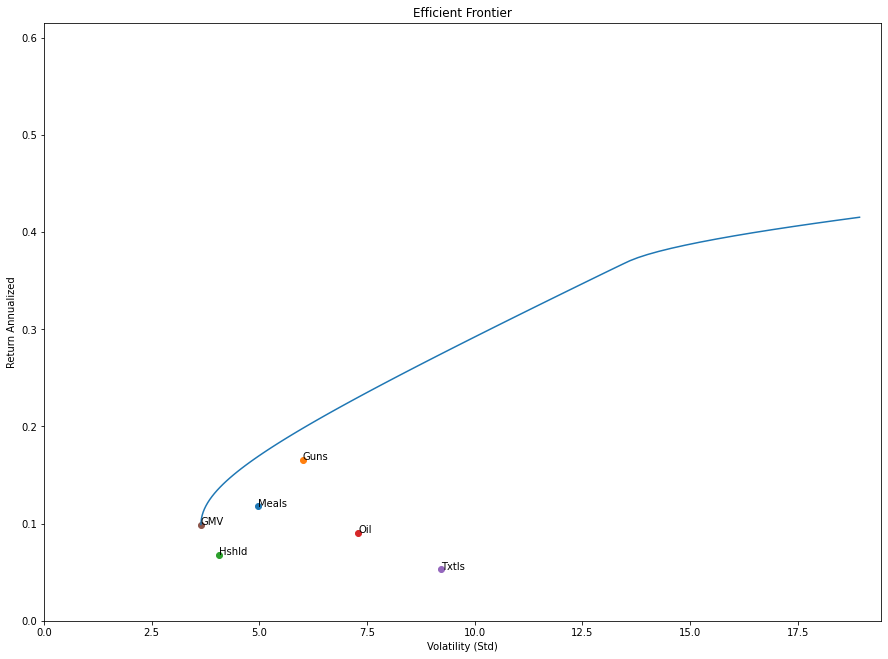

In [214]:
#Expected risk free rate == 0
#show_cml --> False, (no rf)
#show gmv --> show global minimum variance portfolio 
#bounds(0,1) --> unable to short or use any levrage

f.plot_ef(E_return, E_cov, 0, Nbr_PTF, show_cml=False, show_gmv=True, bounds = (-2,2))

f.msr(Expected_Risk_free, E_return, E_cov, bounds = (-2,2))

### (b) Graph the mean-variance frontier with risk-free asset of the selected 5 industry portfolios. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the introduction of a risk-free asset.



<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return Annualized'>

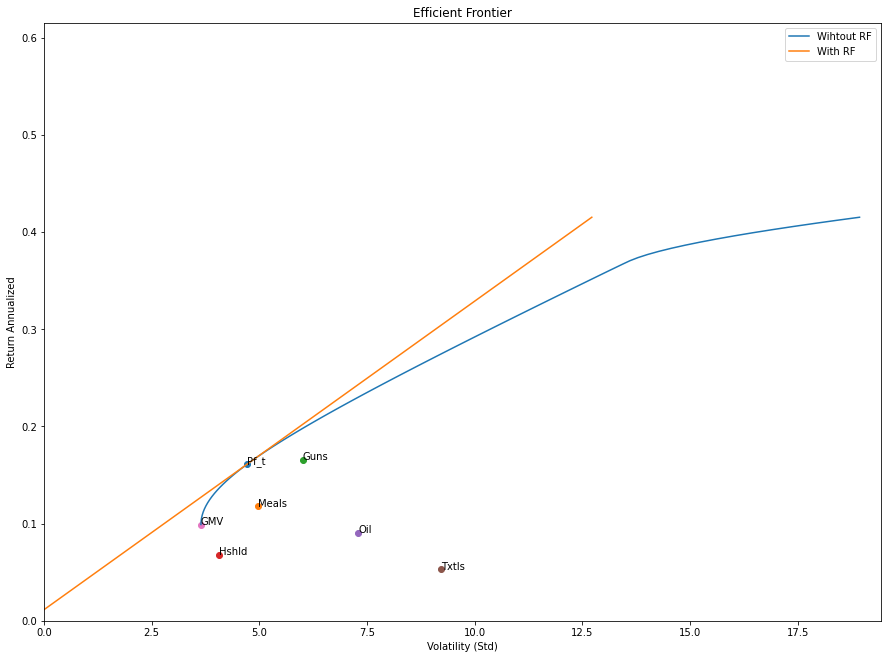

In [8]:
#Expected risk free rate added
#show_cml --> efficient frontier with rf
#show gmv --> show global minimum variance portfolio
#bounds(-2,2) --> able to short -2, and long 2


f.plot_ef(E_return, E_cov, Expected_Risk_free, Nbr_PTF, show_cml=True, show_gmv=True, bounds = (-2,2))

#### Explanations: 

### (c) Describe the tangent portfolio and its characteristics such as its mean and variance and the weights of each asset


In [9]:
#Tangent Portfolio --> maximiser le sharpe ratio
w = f.msr(Expected_Risk_free, E_return, E_cov, bounds=(-2,2))
ret =round(f.portfolio_return(w, E_return),2)
vol = round(f.portfolio_vol(w, E_cov),2)
#Print the caracteristics
print(round(w.sum(), 4))
print("Return of the portfolio tangent are:", ret,
      " Volatility is ", vol,
      "Weights :", np.round(w,2) )

1.0
Return of the portfolio tangent are: 0.16  Volatility is  4.72 Weights : [ 0.69  0.56  0.11 -0.02 -0.34]


### (d) Graph the mean-variance frontier without risk-free asset under short-sale constraints on each industry portfolio. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the constraint.



<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return Annualized'>

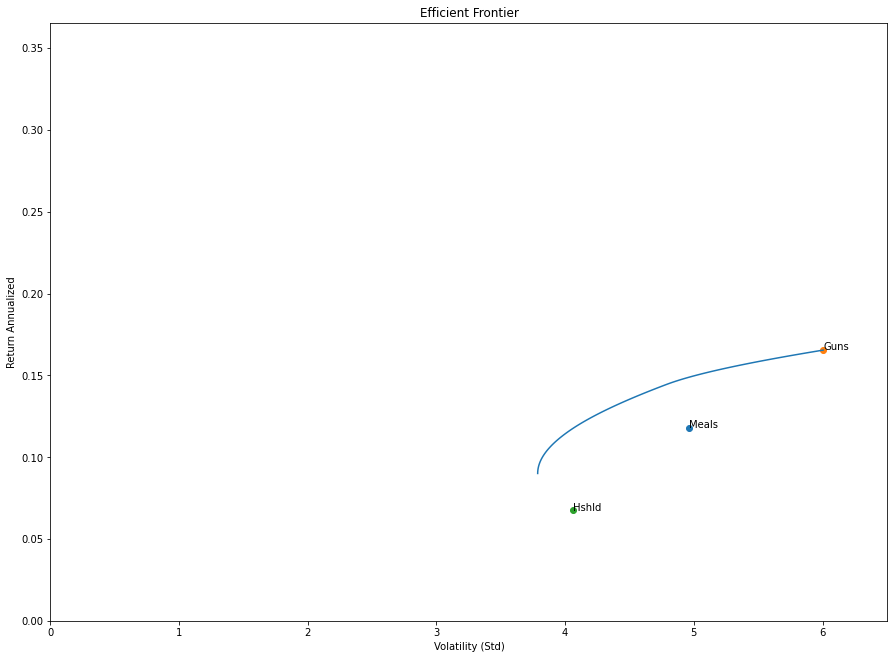

In [10]:
#Expected risk free rate == 0
#show_cml --> efficient frontier without rf
#show gmv --> show global minimum variance portfolio
#bounds(0,1) --> unable to short

f.plot_ef(E_return, E_cov, Expected_Risk_free, Nbr_PTF, bounds = (0, 1),  show_cml=False, show_gmv=False)

#### Explain how the mean-variance frontier has changed with the constraint: (To continue)

### (e) Graph the mean-variance frontier with risk-free asset under short-sale constraints on each industry portfolio. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the constraint.


<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return Annualized'>

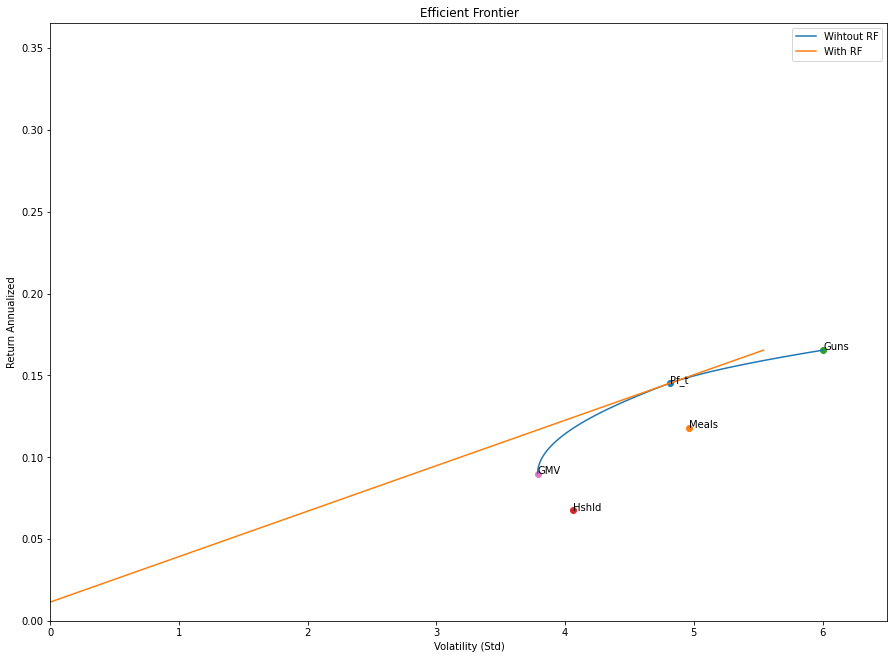

In [11]:
#Expected risk free rate 
#show_cml --> efficient frontier with rf
#show gmv --> show global minimum variance portfolio
#bounds(0, 1) --> unable to short

f.plot_ef(E_return, E_cov, Expected_Risk_free, Nbr_PTF, show_cml=True, show_gmv=True, bounds = (0,1))


#### Explain how the mean-variance frontier has changed with the constraint:

(To Continue)

### (f) Can you find a tangent portfolio under short-sale constraints? If so, describe its characteristics such as its mean and variance and the weights of each asset. Explain how the tangent portfolio has changed with the constraint

In [12]:
#Tangent Portfolio --> maximiser le sharpe ratio
w = f.msr(Expected_Risk_free, E_return, E_cov, bounds=(0,1))
ret =round(f.portfolio_return(w, E_return),2)
vol = round(f.portfolio_vol(w, E_cov),2)
#Print the caracteristics
print(round(w.sum(), 4))
print("Return of the portfolio tangent are:", ret,
      " Volatility is ", vol,
      "Weights :", np.round(w,2) )

1.0
Return of the portfolio tangent are: 0.15  Volatility is  4.81 Weights : [0.42 0.58 0.   0.   0.  ]


Explain:

### (g) Repeat the same calculations in (a)-(f) adding 5 other industry portfolios to the original list of 5 industry portfolios you chose at the start. Compare the results and discuss the advantages and disadvantages of using 10 portfolios instead of 5.

In [13]:
#On pourrait randomnize le sampling
Data_select2 = Data[['Meals','Guns','Hshld','Oil','Txtls','Food', 'Util', 'Chems', 'Drugs', 'Rtail']]

# Expected return : other possible approach simple machine learning with technical indicator 
E_return = f.annualize_rets(Data_select2/100, 12)  #On a besoin des rendement annualisées comme le risk free rate est annualisé 
E_cov = Data_select2.cov() # Just for test
Nbr_PTF = 100


#### g-(a) Graph the mean-variance frontier without risk-free asset of the selected 10 industry portfolios.

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return Annualized'>

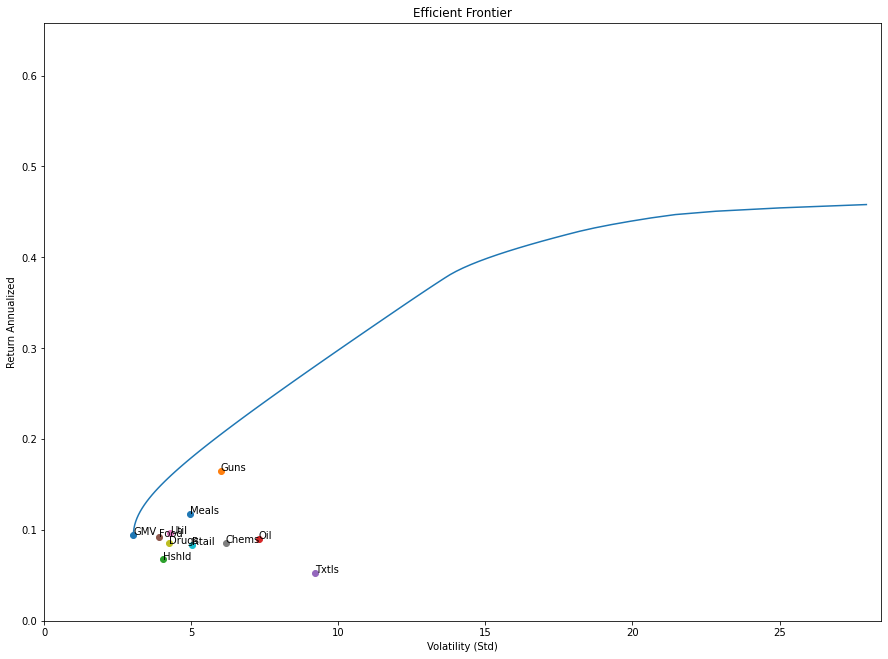

In [14]:
#Expected risk free rate == 0
#show_cml --> False, (no rf)
#show gmv --> show global minimum variance portfolio 
#bounds(0,1) --> unable to short or use any levrage

f.plot_ef(E_return, E_cov, 0, Nbr_PTF, show_cml=False, show_gmv=True, bounds = (-2,2))

#### g-(b) Graph the mean-variance frontier with risk-free asset of the selected 10 industry portfolios. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the introduction of a risk-free asset.

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return Annualized'>

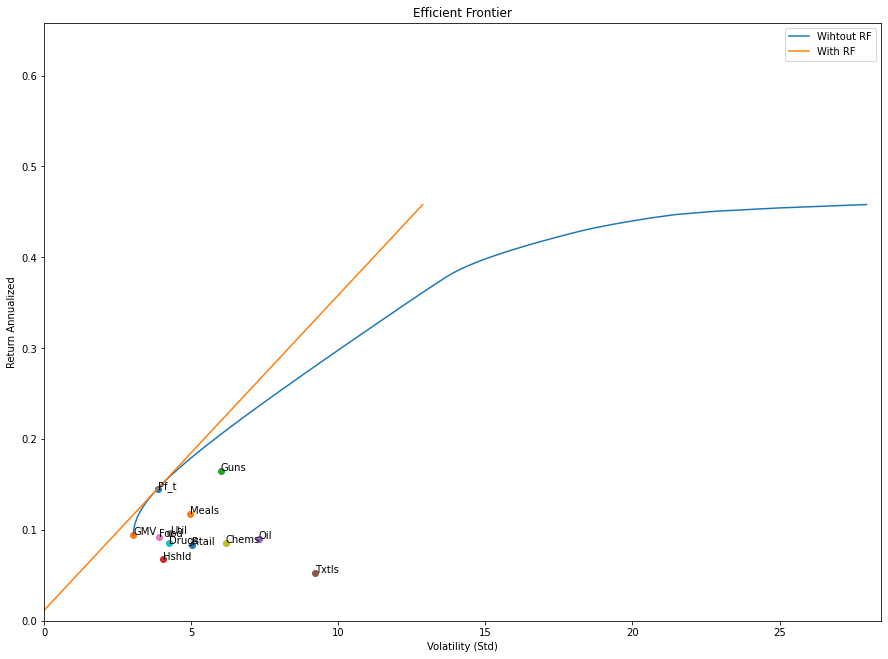

In [15]:
#Expected risk free rate added
#show_cml --> efficient frontier with rf
#show gmv --> show global minimum variance portfolio
#bounds(-2,2) --> able to short -2, and long 2


f.plot_ef(E_return, E_cov, Expected_Risk_free, Nbr_PTF, show_cml=True, show_gmv=True, bounds = (-2,2))

#### g-(c) Describe the tangent portfolio and its characteristics such as its mean and variance and the weights of each asset

In [16]:
#Tangent Portfolio --> maximiser le sharpe ratio
w = f.msr(Expected_Risk_free, E_return, E_cov, bounds=(-2,2))
ret =round(f.portfolio_return(w, E_return),2)
vol = round(f.portfolio_vol(w, E_cov),2)
#Print the caracteristics
print(round(w.sum(), 4))
print("Return of the portfolio tangent are:", ret,
      " Volatility is ", vol,
      "Weights :", np.round(w,2) )

1.0
Return of the portfolio tangent are: 0.15  Volatility is  3.86 Weights : [ 0.39  0.41 -0.18 -0.08 -0.22  0.28  0.27 -0.1   0.19  0.04]


#### g-(d) Graph the mean-variance frontier without risk-free asset under short-sale constraints on each industry portfolio. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the constraint.

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return Annualized'>

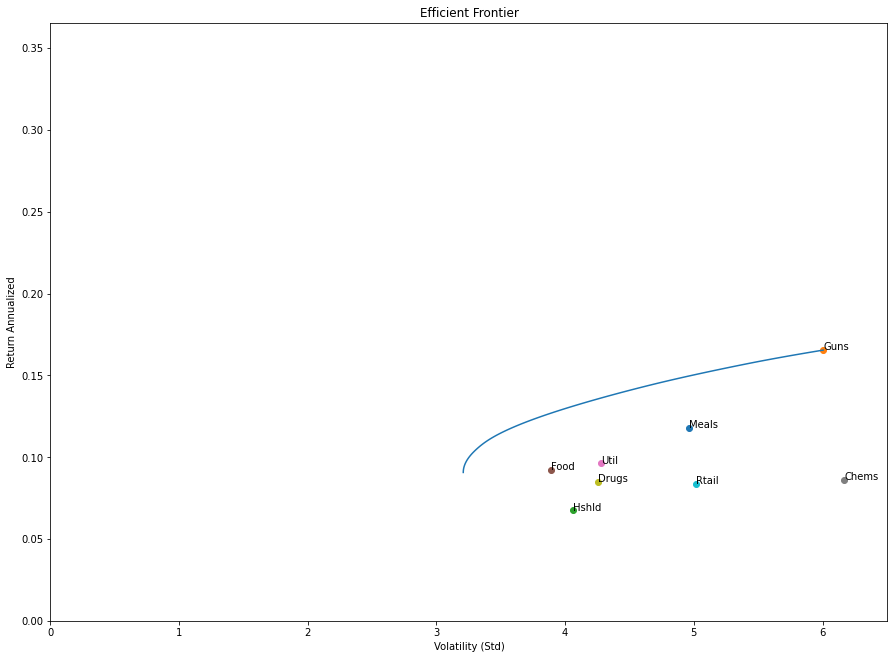

In [17]:
#Expected risk free rate == 0
#show_cml --> efficient frontier without rf
#show gmv --> show global minimum variance portfolio
#bounds(0,1) --> unable to short

f.plot_ef(E_return, E_cov, Expected_Risk_free, Nbr_PTF, bounds = (0, 1),  show_cml=False, show_gmv=False)

#### g-(e) Graph the mean-variance frontier with risk-free asset under short-sale constraints on each industry portfolio. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the constraint.

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return Annualized'>

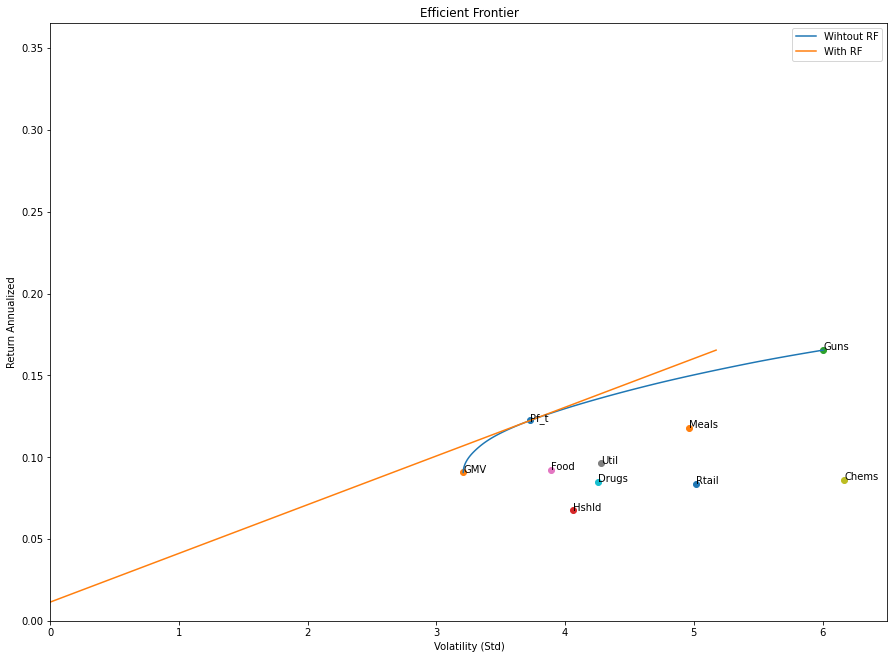

In [18]:
#Expected risk free rate 
#show_cml --> efficient frontier with rf
#show gmv --> show global minimum variance portfolio
#bounds(0, 1) --> unable to short

f.plot_ef(E_return, E_cov, Expected_Risk_free, Nbr_PTF, show_cml=True, show_gmv=True, bounds = (0,1))

#### g-(f) Can you find a tangent portfolio under short-sale constraints? If so, describe its characteristics such as its mean and variance and the weights of each asset. Explain how the tangent portfolio has changed with the constraint

In [94]:
#Tangent Portfolio --> maximiser le sharpe ratio
w = f.msr(Expected_Risk_free, E_return, E_cov, bounds=(0,1))
ret =round(f.portfolio_return(w, E_return),2)
vol = round(f.portfolio_vol(w, E_cov),2)
#Print the caracteristics
print(round(w.sum(), 4))
print("Return of the portfolio tangent are:", ret,
      " Volatility is ", vol,
      "Weights :", np.round(w,2) )

w

1.0
Return of the portfolio tangent are: 0.15  Volatility is  4.81 Weights : [0.42 0.58 0.   0.   0.  ]


array([4.24080911e-01, 5.75919089e-01, 0.00000000e+00, 0.00000000e+00,
       8.07730619e-18])

### (h) The investment policy statement now limits you to invest in up to 3 industry portfolios from the original list of 5 industry portfolios. Repeat the same calculations in (a)-(f) with this additional constraint on the maximum number of assets. Is the optimal combination of assets the same for every target expected return?

In [218]:
#Est-ce qu'on fait une contrainte dans l'optimisateur?
#On peut prendre les 3 maximum weight in abs(value)
Data_select = Data[['Txtls','Guns','Hshld','Oil','Meals']]

E_return = f.annualize_rets(Data_select/100, 12)  #On a besoin des rendement annualisées comme le risk free rate est annualisé 
E_cov = Data_select.cov() # Just for test
Nbr_PTF = 100

#### h-(a) Graph the mean-variance frontier without risk-free asset of the selected 3 industry portfolios. vs 5


In [278]:

#Without shorting
bounds_to_try_W_O_S = [
[(0, 1), (0, 1), (0, 1), (0, 0), (0, 0)],
[(0, 1), (0, 0), (0, 1), (0, 1), (0, 0)],
[(0, 1), (0, 0), (0, 0), (0, 1), (0, 1)],
[(0, 1), (0, 1), (0, 0), (0, 1), (0, 0)],
[(0, 1), (0, 1), (0, 0), (0, 0), (0, 1)],
[(0, 1), (0, 0), (0, 1), (0, 0), (0, 1)],
[(0, 0), (0, 1), (0, 1), (0, 1), (0, 0)],
[(0, 0), (0, 1), (0, 0), (0, 1), (0, 1)],
[(0, 0), (0, 0), (0, 1), (0, 1), (0, 1)],
[(0, 0), (0, 1), (0, 1), (0, 0), (0, 1)]]

#With shorting
bounds_to_try_WS = [
[(-2, 2), (-2, 2), (-2, 2), (0, 0), (0, 0)],
[(-2, 2), (0, 0), (-2, 2), (-2, 2), (0, 0)],
[(-2, 2), (0, 0), (0, 0), (-2, 2), (-2, 2)],
[(-2, 2), (-2, 2), (0, 0), (-2, 2), (0, 0)],
[(-2, 2), (-2, 2), (0, 0), (0, 0), (-2, 2)],
[(-2, 2), (0, 0), (-2, 2), (0, 0), (-2, 2)],
[(0, 0), (-2, 2), (-2, 2), (-2, 2), (0, 0)],
[(0, 0), (-2, 2), (0, 0), (-2, 2), (-2, 2)],
[(0, 0), (0, 0), (-2, 2), (-2, 2), (-2, 2)],
[(0, 0), (-2, 2), (-2, 2), (0, 0), (-2, 2)]]




<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return Annualized'>

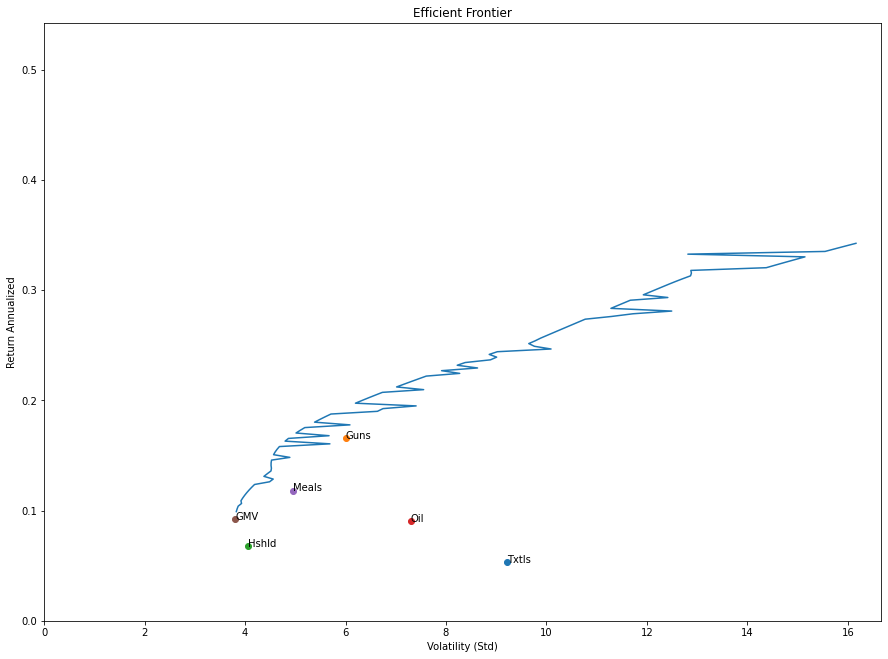

In [279]:
f3.plot_ef_3(E_return, E_cov, 0, Nbr_PTF, bounds_to_try_WS,  show_cml=False, show_gmv=True)


#### h-(b) Graph the mean-variance frontier with risk-free asset of the selected 3 industry portfolios. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the introduction of a risk-free asset.

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return Annualized'>

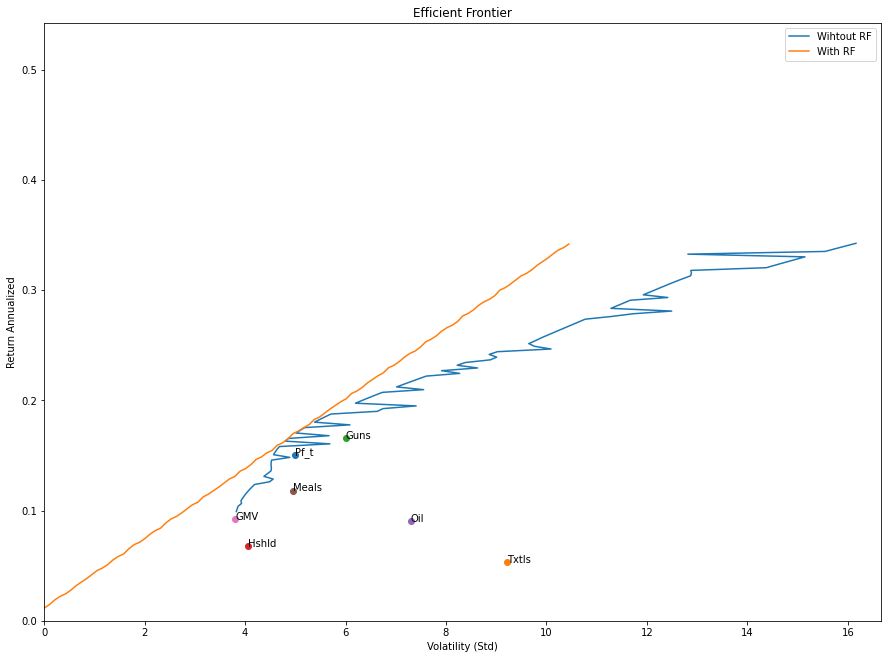

In [323]:
f3.plot_ef_3(E_return, E_cov, Expected_Risk_free, Nbr_PTF, bounds_to_try_WS,  show_cml=True, show_gmv=True)

#### h-(c) Describe the tangent portfolio and its characteristics such as its mean and variance and the weights of each asset

In [327]:
#Trouver portefeuille maximum sharp ratio (Regler probleme de la fonction ou expliquer)

#Tangent Portfolio --> maximiser le sharpe ratio
w = f3.msr_3(Expected_Risk_free, E_return, E_cov, bounds_to_try_WS)
ret =round(f.portfolio_return(w, E_return),2)
vol = round(f.portfolio_vol(w, E_cov),2)
#Print the caracteristics
print(round(w.sum(), 4))
print("Return of the portfolio tangent are:", ret,
      " Volatility is ", vol,
      "Weights :", np.round(w,2) )

1.0
Return of the portfolio tangent are: 0.15  Volatility is  5.0 Weights : [ 0.    0.61 -0.08  0.    0.47]


#### h-(d) Graph the mean-variance frontier without risk-free asset under short-sale constraints on each industry portfolio. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the constraint.

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return Annualized'>

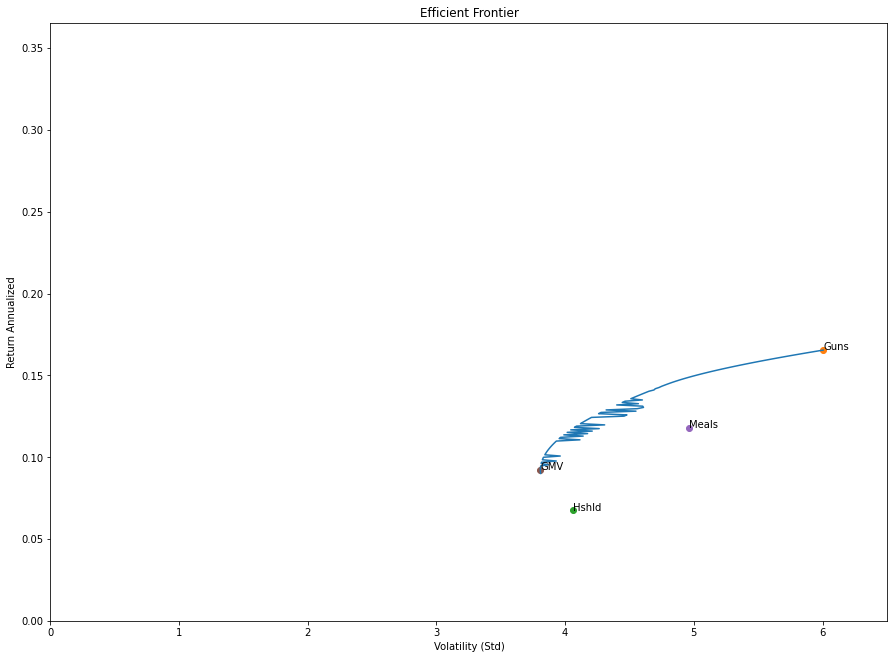

In [324]:
f3.plot_ef_3(E_return, E_cov, 0, Nbr_PTF, bounds_to_try_W_O_S,  show_cml=False, show_gmv=True)

#### h-(e) Graph the mean-variance frontier with risk-free asset under short-sale constraints on each industry portfolio. Display each industry portfolio in the chart. Explain how the mean-variance frontier has changed with the constraint.

<AxesSubplot:title={'center':'Efficient Frontier'}, xlabel='Volatility (Std)', ylabel='Return Annualized'>

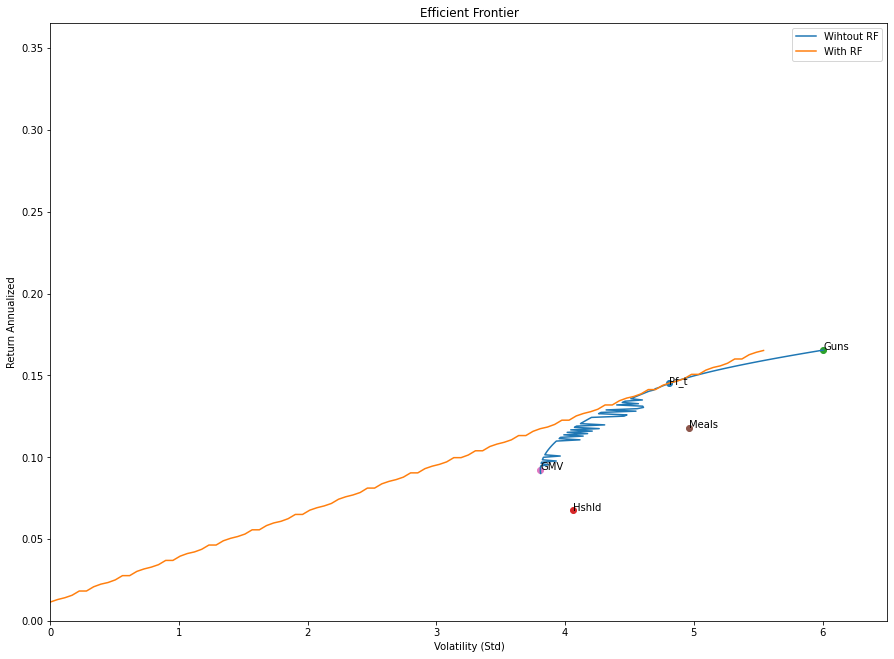

In [326]:
f3.plot_ef_3(E_return, E_cov, Expected_Risk_free, Nbr_PTF, bounds_to_try_W_O_S,  show_cml=True, show_gmv=True)

#### h-(f) Can you find a tangent portfolio under short-sale constraints? If so, describe its characteristics such as its mean and variance and the weights of each asset. Explain how the tangent portfolio has changed with the constraint

In [329]:
#Tangent Portfolio --> maximiser le sharpe ratio
w = f3.msr_3(Expected_Risk_free, E_return, E_cov, bounds_to_try_W_O_S)
ret =round(f.portfolio_return(w, E_return),2)
vol = round(f.portfolio_vol(w, E_cov),2)
#Print the caracteristics
print(round(w.sum(), 4))
print("Return of the portfolio tangent are:", ret,
      " Volatility is ", vol,
      "Weights :", np.round(w,2) )

1.0
Return of the portfolio tangent are: 0.15  Volatility is  4.81 Weights : [0.   0.57 0.   0.   0.43]


## Question 2

### (a) Implement the portfolio resampling approach to demonstrate the effect of estimation uncertainty on the mean-variance frontier and tangent portfolios computed in Question 1.

#### Result presentation : 

#### Determination of the maximum return portfolio (without short sell) :

### (b) Instead of choosing 5 industries randomly as you did in Question 1, find the 5 industries among the 48 industries that maximize the Sharpe ratio with and without short selling constraints. Propose and implement methods to identify industries and their weights.

Look at the excess return per st deviation for combinations of 5 industrie portfolio (To continue)

# À faire : 

- Fonction pour avoir le portefeuille tangente (Fait)
- Plot frontiere efficiente (Sans RF) + avec assets pour visualiser le portefeuille tangente  (Fait)
- Créer une fonction a l'aide matplotlib.pyplot afin de faire de beaux graphes (Fait)
- On pourrait mettre les returns + volatilité annualisées (Fait)
- Répondres aux questions
- Améliorer fonctions pour 3 industries
- Lorsque la np.sum(w) != 1, j'aimerais qu'on trouve le vecteur ayant le plus bas variance ou plus pondération à voir(C'est pourquoi au h(b) le portfolio tangente n'a pas rapport)


Si on a le temps:
- Trouver une méthodologie pour calculer les Returns des assets (Vincent semblait avoir une méthode)
- Trouver une méthodologie pour calculer la matrice de covariance (À voir)